# Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if we have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the hackathon that lets you do that.

With this prediction we would be able to find the what kind of doctor is oing to charge the fees or the consultation fees:





FEATURES are as follows :

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.





Importing or calling all necessary models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# DataSet:
Loading / Cleaning / Formatting

In [2]:
#loading the given datasets:
df=pd.read_csv('Final_Train.csv')
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
dft=pd.read_csv('Final_Test.csv')
dft

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [4]:
dft=pd.DataFrame(dft)

In [5]:
dft.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [6]:
#shape of the datasets train and test datas:
print(df.shape)
print(dft.shape)

(5961, 7)
(1987, 6)


In [7]:
print(df.info())
print(dft.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profil

# Checking missing Values:

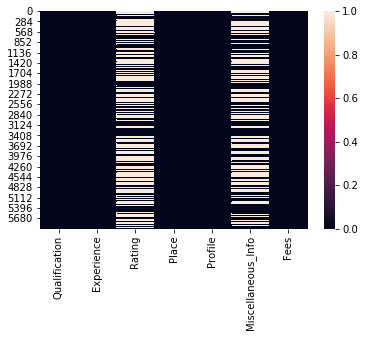

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

The above both graph is here to show that if there are any null values in the above dataset, there are some of the white lines which represent that there are some missing values under rating and misc_info(Null Values). 

In order to get more clearity we have taken out the sum of the total Null Values down which is giving the exact amount of missing values . There are missing values present in ratings and misc_info. 
Hence we will be removing it.

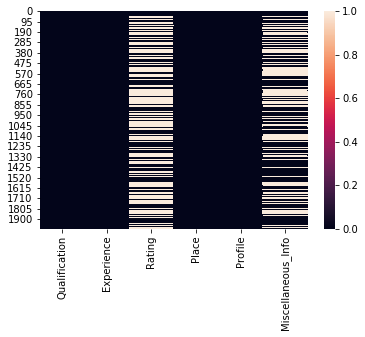

In [10]:
sns.heatmap(dft.isnull())

In [11]:
dft.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

# Formatting Dataset:

In [12]:
#only extracting the number of years int value:
df['Experience'] =df['Experience'].str[0:-17].astype(int)

In [13]:
dft['Experience'] = dft['Experience'].str[0:-17].astype(int)

In [14]:
#Extracting the numbers and removing "%" sign:
df['Rating'] = df['Rating'].str[0:-1].astype(float)

In [15]:
dft['Rating'] = dft['Rating'].str[0:-1].astype(float)

In [16]:
df['Place'].fillna('none, none', inplace=True)
dft['Place'].fillna('none, none', inplace=True)

In [17]:
#Seperating Area and city in seperate columns:
df['Area'] = df['Place'].str.rsplit(',', 1).str.get(0)
df['City'] = df['Place'].str.rsplit(',', 1).str.get(1)
dft['Area'] = dft['Place'].str.rsplit(',', 1).str.get(0)
dft['City'] = dft['Place'].str.split(',', 1).str.get(1)

In [18]:
df['City'] = df['City'].str.strip()
dft['City'] =dft['City'].str.strip()

In [19]:
df.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai
5,BAMS,8,NaN,"Porur, Chennai",Ayurveda,NaN,100,Porur,Chennai
6,BHMS,42,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200,Karol Bagh,Delhi
7,BDS,10,99.0,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,Arekere,Bangalore
8,"MBBS, MD - General Medicine",14,NaN,"Old City, Hyderabad",General Medicine,NaN,100,Old City,Hyderabad
9,"BSc, BDS",23,NaN,"Athani, Ernakulam",Dentist,NaN,100,Athani,Ernakulam


# Uniqueness

In [20]:
df['City'].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', 'none', nan],
      dtype=object)

In [21]:
dft['City'].unique()

array(['Mumbai', 'Hyderabad', 'Chennai', 'Delhi', 'Bangalore',
       'Coimbatore', 'Thiruvananthapuram', 'Ernakulam', 'none'],
      dtype=object)

In [22]:
# 1 city has a nan value replacing it with none:
df[df['City'].isnull()]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City
3980,BDS,23,NaN,e,Dentist,NaN,250,e,NaN


In [23]:
df.loc[df['City'].isnull(), 'Area'] = 'none'
df['City'] =df['City'].fillna('none')

In [24]:
df['City'].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', 'none'], dtype=object)

In [25]:
df['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [26]:
dft['Profile'].unique()

array(['General Medicine', 'ENT Specialist', 'Dermatologists', 'Ayurveda',
       'Dentist', 'Homeopath'], dtype=object)

In [27]:
#If ther is any misc_info for the doctor then creating a seperate column 1=has_mis_info, 0 =doesnt have misc_info:
df['Has_Mis_Info'] = (~df['Miscellaneous_Info'].isnull())
dft['Has_Mis_Info'] = (~dft['Miscellaneous_Info'].isnull())

In [28]:
df['Has_Mis_Info'] =df['Has_Mis_Info'].astype(int)
dft['Has_Mis_Info'] =dft['Has_Mis_Info'].astype(int)

In [29]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City,Has_Mis_Info
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,1
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,1
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,0
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,1
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,1


In [30]:
dft.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Area,City,Has_Mis_Info
0,MBBS,35,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,Ghatkopar East,Mumbai,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,West Marredpally,Hyderabad,0
2,"MBBS, DDVL",40,70.0,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai,1
3,BAMS,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,New Ashok Nagar,Delhi,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100.0,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore,1


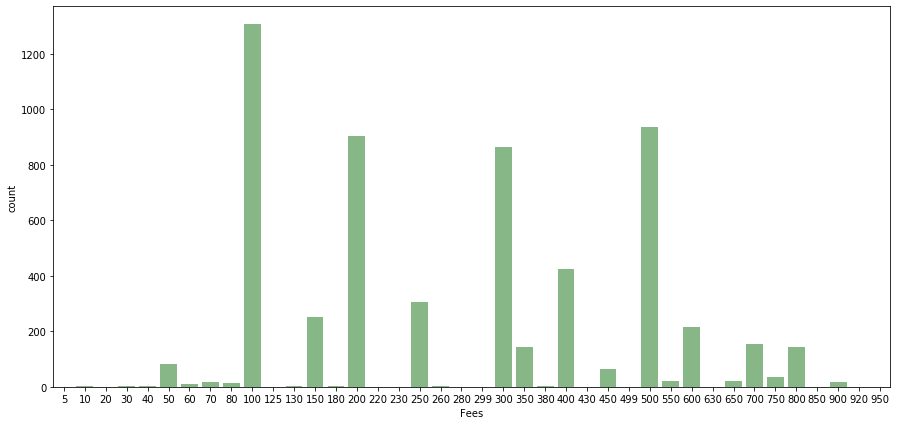

In [31]:
fig,ax= plt.subplots(figsize=(15, 7))
sns.countplot(df['Fees'].sort_values(), ax=ax, color='g', alpha=0.5)
plt.show()

With the above graph, it shows the count of the fees with respect of the doctors counts, where we could determine that highest number of the doctors are charging the consultation fees of 100. Minimum Fees is 50 where the count is less than 100 and maximum fees is 900 there are very few doctors which charge such fees. other than this around 750 doctors charges fees of 200,300,500 each.

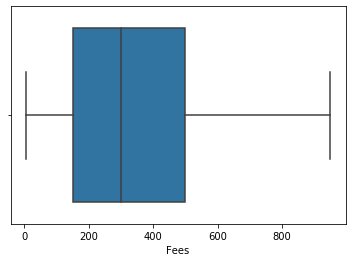

In [32]:
sns.boxplot(df['Fees'])

The abobe boxplot determines the minimum fees and the maximum fees, also have a mean fees by the total number of doctors which is in between 200 and 400 that is around 300. We could also see that the there are no outliers present the the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe2eb7e490>,
      dtype=object)

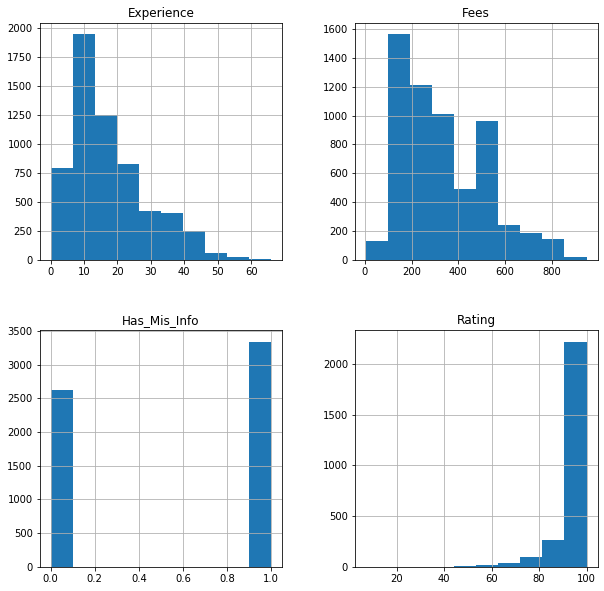

In [33]:
df.hist(figsize=(10,10))

With the help of histogram we could find out the count of the doctors distribution under various variables, such as : The highest number of doctors having experience level between the range of 9 to 20 years, most of the doctors are charging the cunsultation fees in the range of 100 to 400, Around 55 % of the doctors have misc_info  in the whole data, we could also see that around 2400 doctors have received more than 90% of the ratings.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe2ea79510>,
      dtype=object)

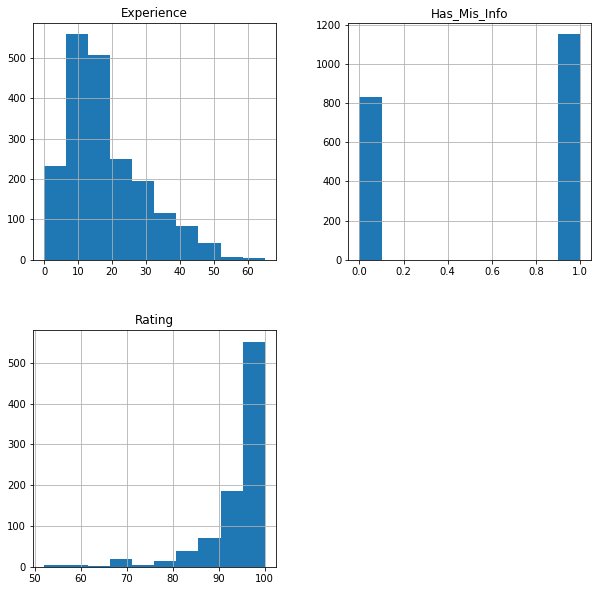

In [34]:
dft.hist(figsize=(10,10))

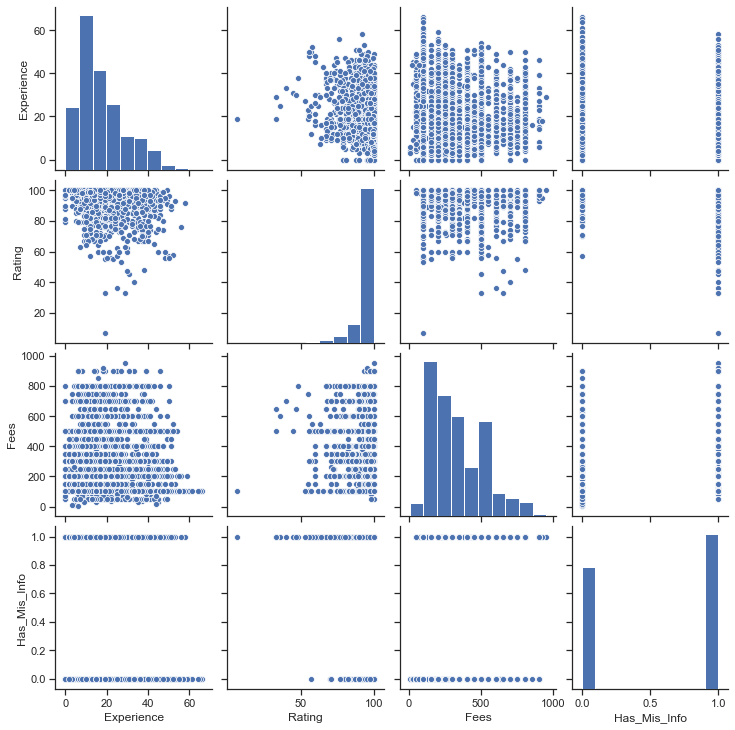

In [35]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)
plt.show()

Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, "/" -->shows the positive corelation where as "" -->shows negative corelation for some there are holizontal lines which shows neutral relationship with each other.

Through the above graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking all of them in to the consideration. But there is one field which is showing negative correlation with the targeted variable that is: Rating
But, we will not be remove this column.

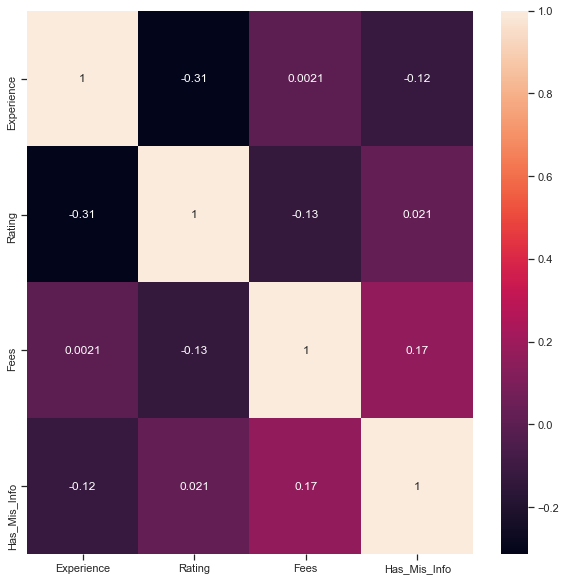

In [36]:
corr_hmap=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

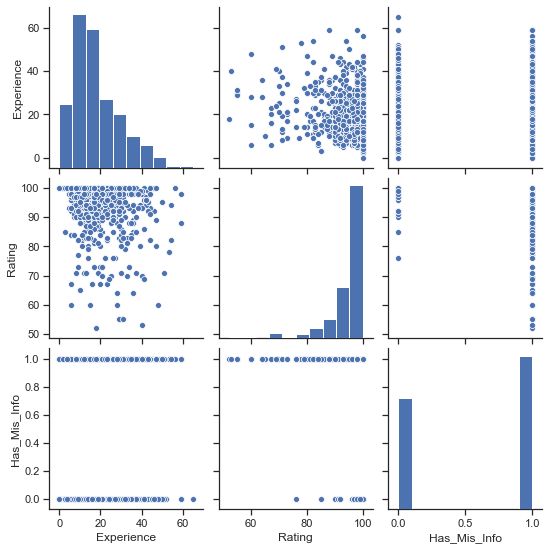

In [37]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dft)
plt.show()

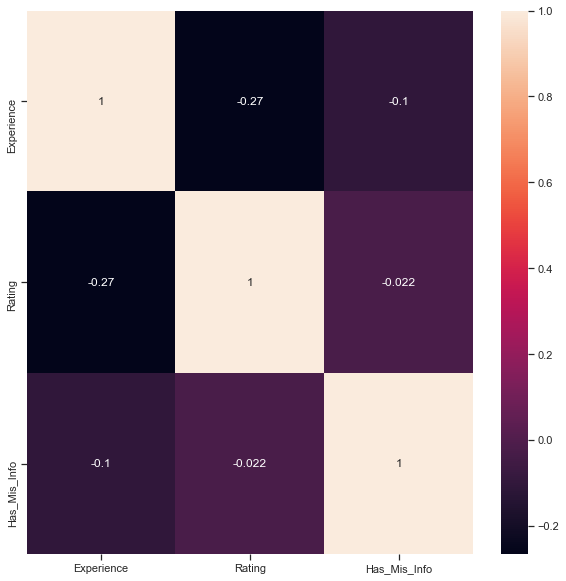

In [38]:
corr_hmap=dft.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Experience         AxesSubplot(0.125,0.125;0.168478x0.755)
Rating          AxesSubplot(0.327174,0.125;0.168478x0.755)
Fees            AxesSubplot(0.529348,0.125;0.168478x0.755)
Has_Mis_Info    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

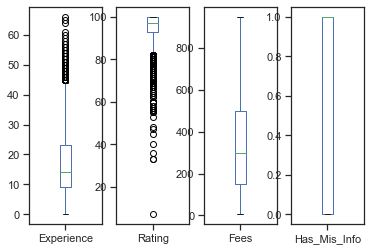

In [39]:
df.plot(kind='box',subplots=True)

The plot box situated above and below are representing the minimum value , maximum value and showing the mean value for the variables. In some of the variables such as: Fees

The graph also shows some variables such as experience and rating , poiters above or below the graph which is used to detect if there are any outliers presnt in the datasets or not. If the detection is accurate then we should be able to treat them in order to get the perfect outcome or result.

Outliers here are the observations that we find at the abnormal distance from other values.

Experience         AxesSubplot(0.125,0.125;0.227941x0.755)
Rating          AxesSubplot(0.398529,0.125;0.227941x0.755)
Has_Mis_Info    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

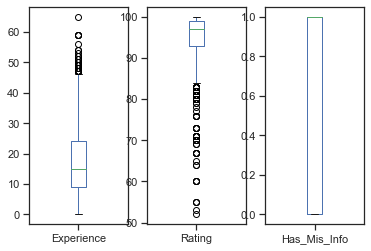

In [40]:
dft.plot(kind='box',subplots=True)

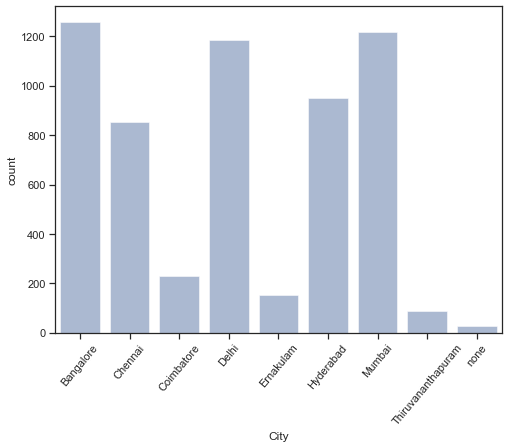

In [41]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['City'].sort_values(), ax=ax, color='b', alpha=0.5)
plt.xticks(rotation=50)
plt.show()

From the above count plot we could see that the maximum doctors present in Bangalore city which is followed by Mumbai and Delhi , which are the metro city in India where as in the city Emakulam and Thiruvananthapuram shows minimum doctor count which is below 200.

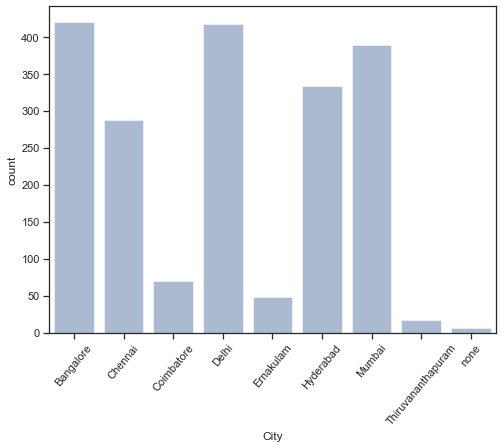

In [42]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(dft['City'].sort_values(), ax=ax, color='b', alpha=0.5)
plt.xticks(rotation=50)
plt.show()

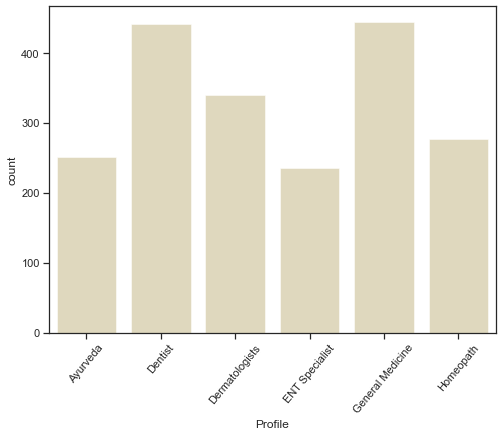

In [43]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(dft['Profile'].sort_values(), ax=ax, color='y', alpha=0.5)
plt.xticks(rotation=50)
plt.show()

From the above countplot we could find out the doctors count with respect to the profile: As we can see only two profiles that is Dentist and General Medicin are above 400 count followed by Dermatologists, where the minimum doctors present in ENT specialist profil which is around 230.

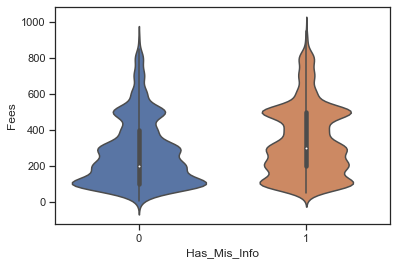

In [44]:
sns.violinplot(x = 'Has_Mis_Info', y = 'Fees', data=df)
plt.show()

Violin plots are a method of plotting numeric data and can be considered a combination of the box plot with a kernel density plot. In the violin plot, we can find the same information as in the box plots. The above graph shows for the doctors having misc_info having the median fees near to 300 where as the doctors with doesnt have the misc_info median fees lies near to 200.

In [45]:
df.dtypes

Qualification          object
Experience              int64
Rating                float64
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                    int64
Area                   object
City                   object
Has_Mis_Info            int64
dtype: object

# Saperation of Profile Variable:

In [46]:
df_qual= pd.crosstab(df.Qualification, df.Profile, margins=True)
df_qual.head()

Profile,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,All
Qualification,,,,,,,
39 years experience,0,0,0,0,1,0,1
"Advanced Certificate Course in Aesthetic Dentistry, BDS, Professional Implantology Training Course (PITC), FAGE- FELLOW, Comprehensive Course in Modern Endodontics",0,1,0,0,0,0,1
"Ayurvedic panchkarma, BAMS",1,0,0,0,0,0,1
"B.Ac, BEMS",0,0,0,0,0,1,1
"B.Sc, BAMS",2,0,0,0,0,0,2


In [47]:
df_qual.sort_values(by=['All'], ascending=False)

Profile,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,All
Qualification,,,,,,,
All,786,1397,1034,728,1173,843,5961
BDS,0,488,0,0,0,0,488
BHMS,0,0,1,0,0,476,477
BAMS,470,0,0,0,0,1,471
MBBS,0,0,8,6,320,0,334
...,...,...,...,...,...,...,...
"DNB - Dermatology & Venereology, MBBS, DDVL",0,0,1,0,0,0,1
"DNB - Dermatology & Venereology, MBBS, DDV, DDVL",0,0,1,0,0,0,1
"DNB - Dermatology & Venereology, Fellowship in Cosmetology, DVD, MBBS",0,0,1,0,0,0,1


In [48]:
# Ayurveda
df['ayurveda_bams'] = np.where((df.Profile == 'Ayurveda') & df.Qualification.str.contains(r'\bBAMS\b'),1,0)
df['ayurveda_ms'] = np.where((df.Profile == 'Ayurveda') & df.Qualification.str.contains(r'\bMS\b'),1,0)
df['ayurveda_md'] = np.where((df.Profile == 'Ayurveda') & df.Qualification.str.contains(r'\bMD\b'),1,0)

In [49]:
# Dentist
df['dentist_bds'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'\bBDS\b'),1,0)
df['dentist_mds'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'\bMDS\b'),1,0)
df['dentist_orthodontics'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'orthodon', case=False),1,0)
df['dentist_periodontics'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'periodon', case=False),1,0)
df['dentist_prosthodontics'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'prosthodon', case=False),1,0)
df['dentist_oralandmaxi'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'Oral & Maxillofacial Surgery', case=False),1,0)
df['dentist_cosmetic'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'cosmetic', case=False),1,0)

In [50]:
# Dermatology
df['dermatology_md'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'\bMD\b'),1,0)
df['dermatology_venereology'] = np.where((df.Profile == 'Dermatologists') & (df.Qualification.str.contains(r'\bDDV\b') | df.Qualification.str.contains(r'venereology', case=False)),1,0)
df['dermatology_leprosy'] = np.where((df.Profile == 'Dermatologists') & (df.Qualification.str.contains(r'\bDDVL\b') | df.Qualification.str.contains(r'leprosy', case=False)),1,0)
df['dermatology_dnb'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'\bDNB\b'),1,0)
df['dermatology_cosmetic'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'cosmetic', case=False),1,0)

In [51]:
# ENT - MS, Otorhinolaryngology, Oncology
df['ent_ms'] = np.where((df.Profile == 'ENT Specialist') & df.Qualification.str.contains(r'\bMS\b'),1,0)
df['ent_otorhinolaryngology'] = np.where((df.Profile == 'ENT Specialist') & df.Qualification.str.contains(r'otorhinolaryngology', case=False),1,0)
df['ent_oncology'] = np.where((df.Profile == 'ENT Specialist') & df.Qualification.str.contains(r'oncology', case=False),1,0)


In [52]:
#General Medicin 
df['gm_md'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'\bMD\b'),1,0)
df['gm_cardio'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'cardio', case=False),1,0)
df['gm_surgery'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'surgery', case=False),1,0)
df['gm_diabet'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'diabet', case=False),1,0)
df['gm_child'] = np.where((df.Profile == 'General Medicine') & (df.Qualification.str.contains(r'child', case=False) | df.Qualification.str.contains(r'pediat', case=False)),1,0)
df['gm_chest'] = np.where((df.Profile == 'General Medicine') & (df.Qualification.str.contains(r'chest', case=False) | df.Qualification.str.contains(r'tuber', case=False)),1,0)
df['gm_obstet'] = np.where((df.Profile == 'General Medicine') & (df.Qualification.str.contains(r'obstet', case=False) | df.Qualification.str.contains(r'gyna', case=False)),1,0)
df['gm_pulmonary'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'pulmonary', case=False),1,0)
df['gm_psych'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'psych', case=False),1,0)
df['gm_endocrin'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'endocrin', case=False),1,0)
df['gm_rheum'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'rheum', case=False),1,0)

In [53]:
df[df.Profile == 'Ayurveda'].head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City,Has_Mis_Info,...,gm_cardio,gm_surgery,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,1,...,0,0,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,1,...,0,0,0,0,0,0,0,0,0,0
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,1,...,0,0,0,0,0,0,0,0,0,0
5,BAMS,8,NaN,"Porur, Chennai",Ayurveda,NaN,100,Porur,Chennai,0,...,0,0,0,0,0,0,0,0,0,0
11,BAMS,7,NaN,"Somajiguda, Hyderabad",Ayurveda,NaN,100,Somajiguda,Hyderabad,0,...,0,0,0,0,0,0,0,0,0,0
34,BAMS,9,NaN,"IP Extension, Delhi",Ayurveda,NaN,300,IP Extension,Delhi,0,...,0,0,0,0,0,0,0,0,0,0
42,"BAMS, Diploma in Emergency Medicine, Diploma i...",31,100.0,"RT Nagar, Bangalore",Ayurveda,"100% 7 Feedback RT Nagar, Bangalore",500,RT Nagar,Bangalore,1,...,0,0,0,0,0,0,0,0,0,0
43,BAMS,8,NaN,"Saroor Nagar, Hyderabad",Ayurveda,NaN,300,Saroor Nagar,Hyderabad,0,...,0,0,0,0,0,0,0,0,0,0
51,BAMS,9,NaN,"Chetpet, Chennai",Ayurveda,NaN,150,Chetpet,Chennai,0,...,0,0,0,0,0,0,0,0,0,0
54,BAMS,9,100.0,"KPHB, Hyderabad",Ayurveda,Arthritis Management Infertility Evaluation / ...,300,KPHB,Hyderabad,1,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#Dropping the columns which are of no use for the prediction in the models:
df.drop(["Qualification","Place","Miscellaneous_Info"], axis = 1, inplace = True)
df.head()

,Experience,Rating,Profile,Fees,Area,City,Has_Mis_Info,ayurveda_bams,ayurveda_ms,ayurveda_md,...,gm_cardio,gm_surgery,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum
0,24,100.0,Homeopath,100,Kakkanad,Ernakulam,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,98.0,Ayurveda,350,Whitefield,Bangalore,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,9,NaN,ENT Specialist,300,Mathikere - BEL,Bangalore,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,NaN,Ayurveda,250,Bannerghatta Road,Bangalore,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,100.0,Ayurveda,250,Keelkattalai,Chennai,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# LabelEncoder

In [55]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,Experience,Rating,Profile,Fees,Area,City,Has_Mis_Info,ayurveda_bams,ayurveda_ms,ayurveda_md,...,gm_cardio,gm_surgery,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum
0,24,100.0,5,100,297,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,98.0,0,350,856,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,9,NaN,3,300,453,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,NaN,0,250,68,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,100.0,0,250,336,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#missing values in the raitings replacing nan with mean:
df["Rating"] = df["Rating"].fillna(df["Rating"].dropna().mean() )

In [57]:
df.head()

,Experience,Rating,Profile,Fees,Area,City,Has_Mis_Info,ayurveda_bams,ayurveda_ms,ayurveda_md,...,gm_cardio,gm_surgery,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum
0,24,100.000000,5,100,297,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,98.000000,0,350,856,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,9,94.643475,3,300,453,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,94.643475,0,250,68,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,100.000000,0,250,336,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df.describe()

,Experience,Rating,Profile,Fees,Area,City,Has_Mis_Info,ayurveda_bams,ayurveda_ms,ayurveda_md,...,gm_cardio,gm_surgery,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,...,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,94.643475,2.441872,307.944640,413.575071,3.079517,0.560476,0.127328,0.007549,0.028351,...,0.005536,0.007885,0.020634,0.006039,0.002684,0.001678,0.002349,0.002013,0.003020,0.001678
std,11.142798,5.244204,1.658014,190.920373,256.873484,2.313018,0.496371,0.333368,0.086564,0.165987,...,0.074204,0.088452,0.142168,0.077484,0.051743,0.040927,0.048409,0.044826,0.054873,0.040927
min,0.000000,7.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,94.643475,1.000000,150.000000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,94.643475,2.000000,300.000000,410.000000,3.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,96.000000,4.000000,500.000000,627.000000,5.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,66.000000,100.000000,5.000000,950.000000,866.000000,8.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


With the above description we can understand that the total count , mean or average value  along with the standard deviation, minimum value , maximum value , 1st quartile, 2nd and 3rd quartile each columns.

# Skewness

In [59]:
df.skew()

Experience                  0.991089
Rating                     -4.906222
Profile                     0.108803
Fees                        0.751870
Area                        0.110450
City                        0.010640
Has_Mis_Info               -0.243756
ayurveda_bams               2.236555
ayurveda_ms                11.381540
ayurveda_md                 5.684860
dentist_bds                 1.293695
dentist_mds                 2.234292
dentist_orthodontics        6.131494
dentist_periodontics        7.690246
dentist_prosthodontics      6.745916
dentist_oralandmaxi         7.335969
dentist_cosmetic           20.566987
dermatology_md              2.509248
dermatology_venereology     3.084009
dermatology_leprosy         3.178615
dermatology_dnb             6.835134
dermatology_cosmetic       27.248853
ent_ms                      2.967995
ent_otorhinolaryngology     3.729493
ent_oncology               20.566987
gm_md                       2.956508
gm_cardio                  13.331593
g

In [61]:
#Treatment for the skewed data:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [62]:
df.skew()

Experience                 -0.895198
Rating                     -4.906222
Profile                     0.108803
Fees                       -0.298173
Area                        0.110450
City                        0.010640
Has_Mis_Info               -0.243756
ayurveda_bams               2.236555
ayurveda_ms                11.381540
ayurveda_md                 5.684860
dentist_bds                 1.293695
dentist_mds                 2.234292
dentist_orthodontics        6.131494
dentist_periodontics        7.690246
dentist_prosthodontics      6.745916
dentist_oralandmaxi         7.335969
dentist_cosmetic           20.566987
dermatology_md              2.509248
dermatology_venereology     3.084009
dermatology_leprosy         3.178615
dermatology_dnb             6.835134
dermatology_cosmetic       27.248853
ent_ms                      2.967995
ent_otorhinolaryngology     3.729493
ent_oncology               20.566987
gm_md                       2.956508
gm_cardio                  13.331593
g

# Changing Column:
Bringing Fees column at the 1st column, inorder to ease of the calculation.

In [63]:
mid = df['Fees']
df.drop(labels=['Fees'], axis=1, inplace = True)
df.insert(0, 'Fees', mid)
df.head()

,Fees,Experience,Rating,Profile,Area,City,Has_Mis_Info,ayurveda_bams,ayurveda_ms,ayurveda_md,...,gm_cardio,gm_surgery,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum
0,4.615121,3.218876,100.000000,5,297,4,1,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.860786,2.564949,98.000000,0,856,0,1,0.693147,0.0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.707110,2.302585,94.643475,3,453,0,0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.525453,2.564949,94.643475,0,68,0,1,0.693147,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.525453,3.044522,100.000000,0,336,1,1,0.693147,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Assigning X AND Y Variables:

In [64]:
x=df.iloc[:,1:37]
x.shape
x

,Experience,Rating,Profile,Area,City,Has_Mis_Info,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,...,gm_cardio,gm_surgery,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum
0,3.218876,100.000000,5,297,4,1,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.564949,98.000000,0,856,0,1,0.693147,0.0,0.693147,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.302585,94.643475,3,453,0,0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.564949,94.643475,0,68,0,1,0.693147,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.044522,100.000000,0,336,1,1,0.693147,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,2.995732,98.000000,3,70,0,1,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5957,3.526361,94.643475,4,536,1,0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5958,3.737670,97.000000,4,216,3,1,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5959,2.772589,90.000000,4,841,6,1,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
y=df.iloc[:,0:1]
y.shape
y

,Fees
0,4.615121
1,5.860786
2,5.707110
3,5.525453
4,5.525453
...,...
5956,5.707110
5957,4.615121
5958,6.398595
5959,4.615121


# StandardScaler
To bring all the values at the same scale

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_scaler = scaler.transform(x)
x = pd.DataFrame(df1_scaler)
x.head(10)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.744598,1.021504e+00,1.543016,-0.453861,0.397991,0.885549,-0.381976,-0.087215,-0.170816,-0.544198,...,-0.074611,-0.089147,-0.145151,-0.077948,-0.051878,-0.040993,-0.048519,-0.044913,-0.055034,-0.040993
1,-0.200435,6.400983e-01,-1.472893,1.722490,-1.331496,0.885549,2.617968,-0.087215,5.854245,-0.544198,...,-0.074611,-0.089147,-0.145151,-0.077948,-0.051878,-0.040993,-0.048519,-0.044913,-0.055034,-0.040993
2,-0.579595,2.710048e-15,0.336652,0.153493,-1.331496,-1.129243,-0.381976,-0.087215,-0.170816,-0.544198,...,-0.074611,-0.089147,-0.145151,-0.077948,-0.051878,-0.040993,-0.048519,-0.044913,-0.055034,-0.040993
3,-0.200435,2.710048e-15,-1.472893,-1.345425,-1.331496,0.885549,2.617968,-0.087215,-0.170816,-0.544198,...,-0.074611,-0.089147,-0.145151,-0.077948,-0.051878,-0.040993,-0.048519,-0.044913,-0.055034,-0.040993
4,0.492628,1.021504e+00,-1.472893,-0.302023,-0.899125,0.885549,2.617968,-0.087215,-0.170816,-0.544198,...,-0.074611,-0.089147,-0.145151,-0.077948,-0.051878,-0.040993,-0.048519,-0.044913,-0.055034,-0.040993
5,-0.731858,2.710048e-15,-1.472893,0.745273,-0.899125,-1.129243,2.617968,-0.087215,-0.170816,-0.544198,...,-0.074611,-0.089147,-0.145151,-0.077948,-0.051878,-0.040993,-0.048519,-0.044913,-0.055034,-0.040993
6,1.528347,2.710048e-15,1.543016,-0.344849,-0.034381,-1.129243,-0.381976,-0.087215,-0.170816,-0.544198,...,-0.074611,-0.089147,-0.145151,-0.077948,-0.051878,-0.040993,-0.048519,-0.044913,-0.055034,-0.040993
7,-0.441855,8.308010e-01,-0.869711,-1.481690,-1.331496,0.885549,-0.381976,-0.087215,-0.170816,1.837567,...,-0.074611,-0.089147,-0.145151,-0.077948,-0.051878,-0.040993,-0.048519,-0.044913,-0.055034,-0.040993
8,0.006370,2.710048e-15,0.939834,0.496103,0.830363,-1.129243,-0.381976,-0.087215,-0.170816,-0.544198,...,-0.074611,-0.089147,-0.145151,-0.077948,-0.051878,-0.040993,-0.048519,-0.044913,-0.055034,-0.040993
9,0.685603,2.710048e-15,-0.869711,-1.458331,0.397991,-1.129243,-0.381976,-0.087215,-0.170816,1.837567,...,-0.074611,-0.089147,-0.145151,-0.077948,-0.051878,-0.040993,-0.048519,-0.044913,-0.055034,-0.040993


# MODEL SELECTION
Using different types of model in oder to reach at the optimum solution:

In [67]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)
    return final_r_state

# Linear Regression

In [68]:
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2_score corresponding to random state:  42 is:  0.12695328998552247
r2_score corresponding to random state:  43 is:  0.119618398559165
r2_score corresponding to random state:  44 is:  0.18425935091474765
r2_score corresponding to random state:  45 is:  0.12753474713010082
r2_score corresponding to random state:  46 is:  0.1481041100376943
r2_score corresponding to random state:  47 is:  0.14168772183852085
r2_score corresponding to random state:  48 is:  0.13906833307368327
r2_score corresponding to random state:  49 is:  0.15082753021317574
r2_score corresponding to random state:  50 is:  0.10899851113274373
r2_score corresponding to random state:  51 is:  0.14660639857079616
r2_score corresponding to random state:  52 is:  0.11017794455649854
r2_score corresponding to random state:  53 is:  0.13474285692005505
r2_score corresponding to random state:  54 is:  0.14255445124071897
r2_score corresponding to random state:  55 is:  0.12615305739919824
r2_score corresponding to random stat

# KNeighborsRegressor

In [69]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knn= KNeighborsRegressor()
gknn=GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 28}

In [70]:
knn= KNeighborsRegressor(n_neighbors=28)
r_state=maxr2_score(knn,x,y)

r2_score corresponding to random state:  42 is:  0.1761317810551365
r2_score corresponding to random state:  43 is:  0.15599627923608783
r2_score corresponding to random state:  44 is:  0.22299795651087595
r2_score corresponding to random state:  45 is:  0.17187217768752483
r2_score corresponding to random state:  46 is:  0.1653938203631693
r2_score corresponding to random state:  47 is:  0.17159768233076456
r2_score corresponding to random state:  48 is:  0.19355516599793532
r2_score corresponding to random state:  49 is:  0.16375161165126917
r2_score corresponding to random state:  50 is:  0.1316044425755093
r2_score corresponding to random state:  51 is:  0.17269450559416732
r2_score corresponding to random state:  52 is:  0.13824416068965062
r2_score corresponding to random state:  53 is:  0.18080699498669317
r2_score corresponding to random state:  54 is:  0.19000757964818948
r2_score corresponding to random state:  55 is:  0.14728437806142114
r2_score corresponding to random stat

# Lasso

In [71]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
isreh=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
grid=GridSearchCV(isreh,parameters,cv=10)
grid.fit(x,y)
grid.best_params_

{'alpha': 0.001}

In [72]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lasso=Lasso(alpha=0.001)
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.1283412583975897
r2_score corresponding to random state:  43 is:  0.12131325534371618
r2_score corresponding to random state:  44 is:  0.18391720920400345
r2_score corresponding to random state:  45 is:  0.12784767338821423
r2_score corresponding to random state:  46 is:  0.14785179713032148
r2_score corresponding to random state:  47 is:  0.14215262101389192
r2_score corresponding to random state:  48 is:  0.14054595183852447
r2_score corresponding to random state:  49 is:  0.15129819801827982
r2_score corresponding to random state:  50 is:  0.10953726122232488
r2_score corresponding to random state:  51 is:  0.1468044137775827
r2_score corresponding to random state:  52 is:  0.11097644722351041
r2_score corresponding to random state:  53 is:  0.13535292405889932
r2_score corresponding to random state:  54 is:  0.14363644473083814
r2_score corresponding to random state:  55 is:  0.12694192601021648
r2_score corresponding to random sta

# RandomForestRegressor

In [73]:
from math import log
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,50,100,200,500],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_split': 8,
 'n_estimators': 500}

In [74]:
rr=RandomForestRegressor(bootstrap=True,max_features='log2',min_samples_split=2,n_estimators=500)
rr.fit(x_train, y_train)
rr.score(x_train,y_train)

0.8864925878650982

In [75]:
pred=rr.predict(x_test)
pred

array([5.27365293, 5.87174303, 5.35167774, ..., 5.50340387, 5.81553048,
       6.03414893])

In [76]:
from math import sqrt
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test,pred)))
print("R-squared: ", r2_score(y_test,pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.619237074652975
R-squared:  0.18751927692071935


# GradientBoostingRegressor

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20)
model = GradientBoostingRegressor()
parameters = {'learning_rate': [0.001,0.01,0.1,0.02,0.03,1],
              'subsample'    : [0.9, 0.5, 0.2],
              'n_estimators' : [100,500,1000],
              'max_depth'    : [4,6,8]}
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(x_train, y_train)
grid.best_params_

{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.9}

In [78]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    GBR= GradientBoostingRegressor(learning_rate=0.02,max_depth=4,n_estimators=1000,subsample=0.9)
    GBR.fit(x_train,y_train)
    y_pred=GBR.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.27066164463121645
r2_score corresponding to random state:  43 is:  0.22749631103156942
r2_score corresponding to random state:  44 is:  0.28797199637656146
r2_score corresponding to random state:  45 is:  0.2635496297779939
r2_score corresponding to random state:  46 is:  0.2481226138452699
r2_score corresponding to random state:  47 is:  0.2489912110099115
r2_score corresponding to random state:  48 is:  0.2420028924435882
r2_score corresponding to random state:  49 is:  0.27000643845436567
r2_score corresponding to random state:  50 is:  0.24430635892774288
r2_score corresponding to random state:  51 is:  0.25430473388772523
r2_score corresponding to random state:  52 is:  0.21623753179555638
r2_score corresponding to random state:  53 is:  0.2503010699947893
r2_score corresponding to random state:  54 is:  0.25458259833184305
r2_score corresponding to random state:  55 is:  0.23087705433725725
r2_score corresponding to random state:

# DecisionTreeRegressor

In [79]:
from sklearn.tree import DecisionTreeRegressor
depth =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [80]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


{'max_depth': 6}

In [81]:
y_train_pred =tree.predict(x_train)
y_test_pred =tree.predict(x_test)

In [82]:
from math import sqrt
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.5832281167241661
R-squared:  0.26338457480818334


In [83]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.6201452685229684
R-squared:  0.18513430628656669


# Cross_val_score

In [84]:
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for knn: ",cross_val_score(knn,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for knn: ",cross_val_score(knn,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for R_forest Regressor ",cross_val_score(rr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for R_forst Regressor ",cross_val_score(rr,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for lasso ",cross_val_score(lasso,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for lasso ",cross_val_score(lasso,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for GBR ",cross_val_score(GBR,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for GBR ",cross_val_score(GBR,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for DTC ",cross_val_score(tree,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for DTC ",cross_val_score(tree,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression:  0.1414383062244538
Standard Deviation r2 score for Linear Regression:  0.014368948856858011


Mean r2 score for knn:  0.17584543193130972
Standard Deviation r2 score for knn:  0.01424852619508276


Mean r2 score for R_forest Regressor  0.1825287982289092
Standard Deviation r2 score for R_forst Regressor  0.018514353763459637


Mean r2 score for lasso  0.14190078314496352
Standard Deviation r2 score for lasso  0.014043715373543318


Mean r2 score for GBR  0.25243499512507944
Standard Deviation r2 score for GBR  0.021329007058732


Mean r2 score for DTC  0.1827049941584114
Standard Deviation r2 score for DTC  0.017722470260885886


# K-MEANS CLUSTERING
We are going to try here K-Means Clustering model as I can see the unsupervised machine learning. Here kmeans will try to attempt to classify data without being trained first with labeled data.

In [85]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kModel=kmeans.fit(df)


In [86]:
kModel.labels_

array([0, 1, 0, ..., 2, 1, 1], dtype=int32)

In [87]:
pd.crosstab(df.Fees,kModel.labels_)

col_0,0,1,2
Fees,,,
1.791759,0,1,0
2.397895,0,2,0
3.044522,0,1,0
3.433987,1,1,2
3.713572,1,0,1
3.931826,31,25,25
4.110874,2,0,9
4.262680,3,5,10
4.394449,4,2,6


In [88]:
from sklearn.metrics import homogeneity_score
print(homogeneity_score(kModel.labels_,df.Fees))

0.01268602850442464


# Choosing a Model:

Here after trying with various model for the above dataset, I am going to choose Random forest regressor as the best model for pridicting the consultation fees of the doctors. 

None of the other models showing good result or nearby to Randmon Forest Regressor, where rr RandomForestRegressor is predicting 88.64% accuracy score.

Hence I am going to predict the consultation fees of the doctors with Random Forest Regressor model.

# Saving the file:

In [89]:
from sklearn.externals import joblib

In [90]:
joblib.dump(rr,'Project_13_Doctor_Fees_Analysis.obj')

['Project_13_Doctor_Fees_Analysis.obj']

In [91]:
#loading back the model:
model=joblib.load('Project_13_Doctor_Fees_Analysis.obj')

In [92]:
#Pridicting x_test Randmon Forest Regressor, = rr
rr.predict(x_test)

array([5.27365293, 5.87174303, 5.35167774, ..., 5.50340387, 5.81553048,
       6.03414893])